# Importing Necessary Libraries and Modules

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load The Iris Dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris (1).csv


In [0]:
import io
dfIris = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

# Doing Some Exploratory Data Analysis

In [0]:
# Get the shape of dataset
print(dfIris.shape)

(150, 6)


In [0]:
# Check the values of each columns
print(dfIris.columns.values)

['Id' 'SepalLengthCm' 'SepalWidthCm' 'PetalLengthCm' 'PetalWidthCm'
 'Species']


In [0]:
# Explore informations of each observations and check if there are some NaN values. Using a method of dataframe object:info()
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


From the block of codes above we get infromations that each rows for features dataset already on numeric type. So it is not necessary to convert the type. Each rows dont have any NaN values so no need to drop particular row/ assign a value.

In [0]:
# Drop unnecessary column: Id because that column not affect the prediction
dfIris.drop('Id', axis=1, inplace=True)

In [0]:
dfIris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
# Check species from column species to see how many species in this data and what species. Using method unique() to select the unique value of a pandas series object
nSpecies = dfIris.Species.unique()
print(nSpecies)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [0]:
# From block of codes above there are 3 species: setosa, verticolor, virginica. We want calculate number of observations in thas species respectively
print(dfIris.groupby('Species').size()) # for each species we want calculate observations belong to this particular species

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


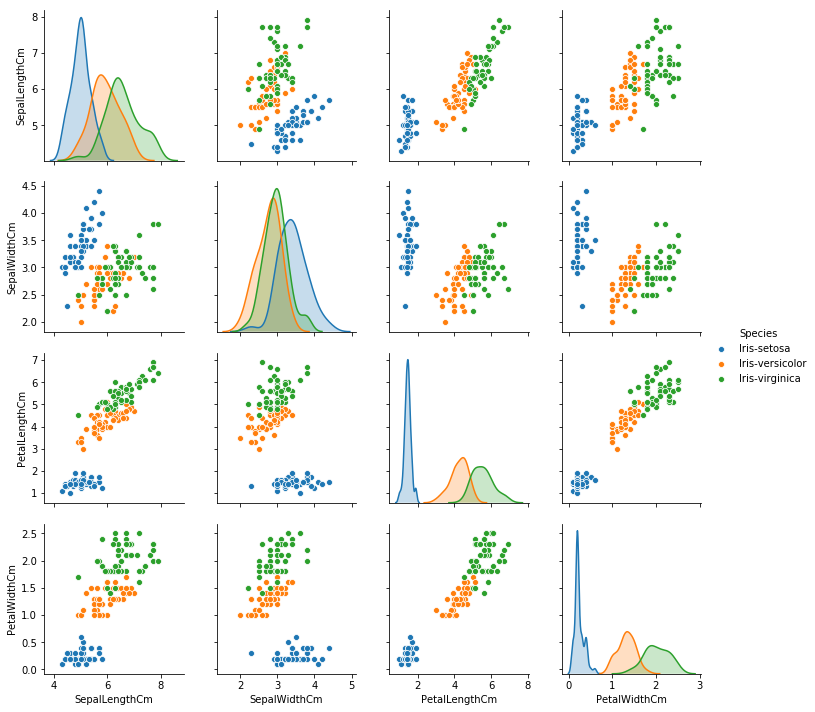

In [0]:
# Plot the scatter plot of each columns versus another columns to see their relationship. For simplicity using seaborn
sns.pairplot(dfIris, hue='Species')

In [0]:
# Another way to get statistical information from this dataset is by using method describe()
dfIris.describe() # The values for each rows need not be normalized because the data on same range

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
#Recheck the dataset
print(dfIris.shape)
print(dfIris.head())

(150, 5)
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


# Convert Pandas Dataframe to Numpy Array

In [0]:
irisDataset = dfIris.values
print(type(irisDataset))
print(irisDataset.shape)
print(irisDataset[0:5,:])

X = dfIris.iloc[:,0:-1].values
print(X[0:5])
print(X.shape)

y = dfIris['Species'].values
print(y[:5])
print(y.shape)

<class 'numpy.ndarray'>
(150, 5)
[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
(150, 4)
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']
(150,)


# Split the iris dataset using SKLearn

The iris dataset sparated randomly to training dataset and test dataset with ratio of 7:3

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [0]:
print('Shape of train dataset {} {}'.format(X_train.shape, y_train.shape))
print('Shape of test dataset {} {}'.format(X_test.shape, y_test.shape))

Shape of train dataset (105, 4) (105,)
Shape of test dataset (45, 4) (45,)


# Begin Classification

In [0]:
# Decision Tree Classifier
def decision3SKL(xTrain, yTrain, xTest, yTest,kriteria, depth):
  decisionTree = DecisionTreeClassifier(criterion=kriteria, max_depth=depth)
  decisionTree.fit(xTrain, yTrain)
  yPredD3 = decisionTree.predict(xTest)
  
  #Model Evaluation
  accTrainD3 = decisionTree.score(xTrain, yTrain)
  accTestD3 = metrics.accuracy_score(yPredD3, yTest)
  print('Classification using Decision Tree: ')
  print('Accuracy of training dataset {}'.format(round(accTrainD3*100,2)))
  print('Accuracy of test dataset {}'.format(round(accTestD3*100,2)))

# K Neighbors Classifier
def knnSKL(xTrain, yTrain, xTest,yTest,nNeighbors):
  Knn = KNeighborsClassifier(n_neighbors=nNeighbors)
  Knn.fit(xTrain, yTrain)
  yPredKnn = Knn.predict(xTest)
  
  #Model Evaluation
  accTestKnn = metrics.accuracy_score(yPredKnn, yTest)
  accTrainKnn = Knn.score(xTrain, yTrain)
  print('\nClassification using K Neighbors Classifier: ')
  print('Number of Nearest Neighbors {}'.format(nNeighbors))
  print('Accuracy training dataset {}'.format(round(accTrainKnn*100,2)))
  print('Accuracy test dataset {}'.format(round(accTestKnn*100,2)))
  
# Logistic Regression Classifier
def logistik(xTrain, yTrain, xTest,yTest,reglr, solvr):
  LR = LogisticRegression(C=reglr, solver=solvr)
  LR.fit(xTrain, yTrain)
  yPredLR = LR.predict(xTest)
  
  #Model Evaluation
  accTestLR = metrics.accuracy_score(yPredLR, yTest)
  accTrainLR = LR.score(xTrain, yTrain)
  print('\nClassifiction using Logistic Regression:')
  print('Accuracy of training dataset {}'.format(round(accTrainLR*100,2)))
  print('Accuracy of test dataset {}'.format(round(accTestLR*100,2)))
  
# Support Vector Machine Classifier
def suppVM(xTrain, yTrain, xTest, yTest, kernelSVM):
  supportVM = SVC(kernel=kernelSVM)
  supportVM.fit(xTrain, yTrain)
  yPredSVM = supportVM.predict(xTest)
  
  accTestSVM = metrics.accuracy_score(yPredSVM, yTest)
  #accTrainSVM = SVC.score(xTrain, yTrain)
  print('\nClassifiction using Support Vector Machine:')
  #print('Accuracy of training dataset {}'.format(round(accTrainSVM*100,2)))
  print('Accuracy of test dataset {}'.format(round(accTestSVM*100,2)))

In [0]:
decision3SKL(X_train, y_train, X_test, y_test, 'entropy', None)
knnSKL(X_train, y_train, X_test, y_test, 3)
logistik(X_train, y_train, X_test, y_test, 0.01, 'newton-cg')
suppVM(X_train, y_train, X_test, y_test, 'rbf')

Classification using Decision Tree: 
Accuracy of training dataset 100.0
Accuracy of test dataset 97.78

Classification using K Neighbors Classifier: 
Number of Nearest Neighbors 3
Accuracy training dataset 97.14
Accuracy test dataset 97.78

Classifiction using Logistic Regression:
Accuracy of training dataset 89.52
Accuracy of test dataset 95.56

Classifiction using Support Vector Machine:
Accuracy of test dataset 97.78


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


FROM TESTING OF MACHINE LEARNING MODEL ABOVE. DECISION TREE, KNN, SVM CLASSIFIERS GET SAME ACCURACY ON TEST DATASET = 97.78

# Begin Clustering using K Means Clustering

In [0]:
dfIrisClust = dfIris.copy()
dfIrisClust.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
dfIrisClust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
dfIrisClust.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

First we create a new variable that contains Species values on numeric type then drop Species column in dataset for the sake of clustering requirement,think of there are no label.

In [0]:
jenis = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
dfIrisClust.Species = dfIrisClust.Species.map(jenis)

print(dfIrisClust.info())
print(dfIrisClust.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


In [0]:
dfIrisClust.Species.unique()

array([0, 1, 2])

In [0]:
dfLabel = dfIrisClust.Species
label = dfIrisClust.Species.values

print(label[0:150])
dfIrisClust.drop('Species', axis=1, inplace=True)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [0]:
dfIrisClust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [0]:
dfIrisClust.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
# Convert dataframe to array
clustX = dfIrisClust.values
print(clustX[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [0]:
# Begin Clustering Using KMeans
from sklearn.cluster import KMeans
def kmeansSKL(data, nCluster, inid, nInit):
  """
  Parameter data adalah data yang digunakan
  nCluster menyatakan banyaknya cluster dalam data tipe integer
  inid untuk init, metode untuk inisiasi centroid. bisa 'kmeans++', 'random', 'nggawe bebas'
  'kmeans++' metode yg udah dioptimasi, 'random' njipuk dari data secara acak
  'nggawe bebas' nganggo array shape [jumcluster, jumfitur]
  n_inid u/ n_init. Tebak centroids sebanyak n kali
  
  """
  
  kMeans = KMeans(n_clusters=nCluster, init=inid, n_init=nInit, )
                                  
  kMeans.fit(data)
  global kMeansLabels
  global kMeansClusterCenters
  kMeansLabels = kMeans.labels_
  kMeansClusterCenters = kMeans.cluster_centers_
  print(kMeansLabels[0:50])
  print(kMeansClusterCenters) #array shape = [n_centers, n_features]
  return kMeansLabels, kMeansClusterCenters

In [0]:
test1 = kmeansSKL(clustX, 3, 'k-means++', 12)
print(test1[0])
print(test1[0].shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
(150,)


In [0]:
dfIrisClust['Species'] = kMeansLabels

In [0]:
dfIrisClust.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
# Evaliating the accuracy of KMeans using metrics accuracy_score

accuracyClust = metrics.accuracy_score(label, kMeansLabels)
print('Accuracy of KMeans Clustering on Iris Dataset = {}%'.format(round(accuracyClust*100, 2)))

Accuracy of KMeans Clustering on Iris Dataset = 89.33%
